In [4]:
import sys, codecs, re, pdb, time, datetime, math, tqdm, pickle, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import numpy as np;
import seaborn as sns;
%matplotlib inline

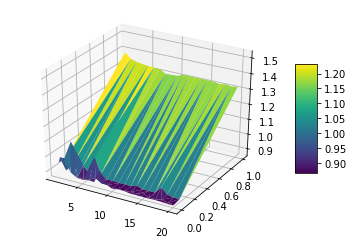

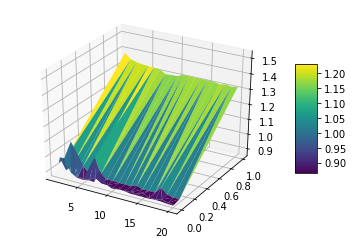

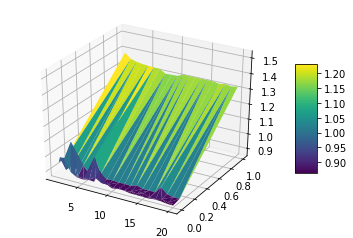

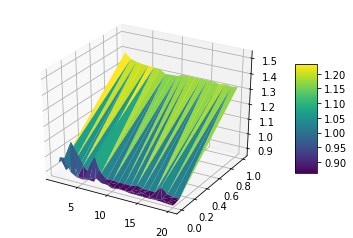

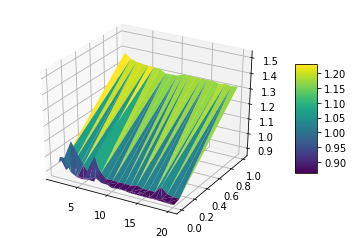

In [108]:
np.random.seed(0)
import matplotlib.pyplot as plt
#import plotly.plotly as py
#import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def draw_RMSE_heatmap(split_data):
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        df = data.loc[data['Iter'] == 20].pivot_table(index='Rank', columns='Lambda', values='RMSE_train', aggfunc=np.median)
        sns.heatmap(df, annot=True, fmt=".5f")
        f_nm = "plots/heatmap_" + split_name + "_RMSEtest_rank_lambda"
        plt.title("Heatmap: final RMSE_test over Rank, " + r"$\lambda$" + " on " + split_name)
        plt.savefig(f_nm.replace(".", "_") + ".png")
        plt.show()

def draw_MRR_heatmap(split_data):
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        df = data.loc[data['Iter'] == 20].pivot_table(index='Rank', columns='Lambda', values='MRR', aggfunc=np.median)
        sns.heatmap(df, annot=True, fmt=".5f")
        f_nm = "plots/heatmap_" + split_name + "_MRR_rank_lambda"
        plt.title("Heatmap: final MRR over Rank, " + r"$\lambda$" + " on " + split_name)
        plt.savefig(f_nm.replace(".", "_") + ".png")
        plt.show()
        
def draw_train_test_plot(split_data):
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        for rank in [10, 20, 30, 60]:
            for lambd in [0.001, 0.02, 0.1, 1.0]:
                df = data.query("Rank == " + str(rank)  + " and Lambda == " + str(lambd) + " and Iter > 1")
                plt.plot(df['Iter'], df['RMSE_train'])
                plt.plot(df['Iter'], df['RMSE_test'])
                plt.xlabel('Epochs')
                plt.ylabel('RMSE_train, RMSE_test')
                plt.legend(['RMSE_train', 'RMSE_test'], loc='upper right')
                plt.title("Train-Test vs Epoch: Rank=" + str(rank) + ", "+r"$\lambda$" + "=" + str(lambd) + " on " + split_name)
                f_nm = "plots/train_test_vs_epoch_" + split_name + "_rank_" + str(rank) + "_lambd_" + str(lambd);
                plt.savefig(f_nm.replace(".", "_") + ".png")
                plt.show()
    return

def draw_MRR_plot(split_data):
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        for rank in [10, 20, 30, 60]:
            for lambd in [0.001, 0.02, 0.1, 1.0]:
                df = data.query("Rank == " + str(rank)  + " and Lambda == " + str(lambd) + " and Iter > 1")
                plt.plot(df['Iter'], df['MRR'])
                #plt.plot(df['Iter'], df['RMSE_test'])
                plt.xlabel('Epochs')
                plt.ylabel('MRR')
                #plt.legend(['RMSE_train'], loc='upper right')
                plt.title("MRR vs Epoch: Rank=" + str(rank) + ", "+r"$\lambda$" + "=" + str(lambd) + " on " + split_name)
                f_nm = "plots/MRR_vs_epoch_" + split_name + "_rank_" + str(rank) + "_lambd_" + str(lambd);
                plt.savefig(f_nm.replace(".", "_") + ".png")
                plt.show()
    return

def draw_surface_plot_RMSE(split_data):
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        #df = data.loc[data['Iter'] == 20].pivot_table(index='Rank', columns='Lambda', values='RMSE_train', aggfunc=np.median)

        # Transform it to a long format
        #df=data.unstack().reset_index()
        #df.columns=["X","Y","Z"]
        df=data

        # And transform the old column name in something numeric
        #df['X']=pd.Categorical(df['X'])
        #df['X']=df['X'].cat.codes

        # Make the plot
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        surf = ax.plot_trisurf(df['Iter'], df['Lambda'], df['RMSE_test'], cmap=plt.cm.viridis, linewidth=0.2)
        fig.colorbar( surf, shrink=0.5, aspect=5)
        plt.show()
    
def draw_surface_plot_RMSE_1(split_data):
    from matplotlib.mlab import griddata
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    from mpl_toolkits.mplot3d import Axes3D
    
    for split in split_data:
        split_name = split[:-4].replace("_", "")
        data = pd.read_csv(split, sep=" ", header=None)
        data.columns = ["Rank", "Lambda", "Iter", "RMSE_train", "RMSE_test", "MRR"]
        df = data.loc[data['Iter'] == 20].pivot_table(index='Rank', columns='Lambda', values='RMSE_train', aggfunc=np.median)
        
        #df = data.loc[data['Iter'] == 20].pivot_table(index='Rank', columns='Lambda', values='MRR', aggfunc=np.median)
        #df = data[data.loc[data['Iter'] == 20]]
        df = data.query("Iter == 20")
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.plot_trisurf(df.Rank, df.Lambda, df.RMSE_test, cmap=cm.jet, linewidth=0.02)
        plt.show()

def draw_surface_plot_MRR(split_data):
    return

def draw_heatmap_plot_mean_std_splits(split_data):
    return

def draw_mean_std_scatter(split_data):
    return

def main():
    split_data = ["split_1.txt", "split_2.txt", "split_3.txt", "split_4.txt", "split_5.txt"]
    
    '''
    draw_RMSE_heatmap(split_data)
    draw_MRR_heatmap(split_data)
    draw_train_test_plot(split_data)
    draw_MRR_plot(split_data)
    '''
    
    draw_surface_plot_RMSE(split_data)
    '''
    draw_surface_plot_MRR(split_data)
    draw_heatmap_plot_mean_std_splits(split_data)
    draw_mean_std_scatter(split_data)
    '''

main()